In [1]:
import pandas as pd
import numpy as np
import os

# Change to project root directory to avoid path issues
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(f"Changed working directory to: {os.getcwd()}")

# Import custom module
from utils.model.model_manager import ModelManager

# Get absolute paths
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "PEPEUSDT_30m_1h-pump05_230520_250302.csv")

# Load historical data
df = pd.read_csv(data_path, parse_dates=['timestamp'])

# Display the first few rows
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2023-05-19 23:00:00,0.000002,0.000002,0.000002,0.000002,4.535950e+11,593.0,3.929414e+11,601200.329838,0,...,NaN,6.478447,0.006536,0.866282,NaN,NaN,NaN,0.732565,NaN,0.655172
1,2023-05-19 23:30:00,0.000002,0.000002,0.000002,0.000002,9.131871e+11,1419.0,4.799168e+11,737315.098445,0,...,NaN,1.107661,0.013072,0.525540,NaN,NaN,NaN,0.051081,NaN,0.655172
2,2023-05-20 00:00:00,0.000002,0.000002,0.000002,0.000002,8.610279e+11,1342.0,2.405221e+11,365641.986755,0,...,NaN,0.387623,0.013158,0.279343,NaN,NaN,NaN,-0.441314,NaN,0.689655
3,2023-05-20 00:30:00,0.000002,0.000002,0.000002,0.000002,2.995694e+11,915.0,1.014557e+11,153237.308537,0,...,NaN,0.512108,0.013245,0.338672,NaN,NaN,NaN,-0.322656,NaN,0.689655
4,2023-05-20 01:00:00,0.000002,0.000002,0.000002,0.000002,9.002313e+10,412.0,4.020848e+10,60714.804330,0,...,NaN,0.807162,0.006623,0.446646,NaN,NaN,NaN,-0.106708,NaN,0.689655


In [2]:
# Initialize our ModelManager with symbol and date range
symbol = "PEPEUSDT"
start_date = "2023-05-20"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into our ModelManager
manager.load_data(custom_path=data_path)

# Split and prepare data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(           open      high       low     close        volume  num_trades  \
 0      0.000002  0.000002  0.000002  0.000002  4.535950e+11       593.0   
 1      0.000002  0.000002  0.000002  0.000002  9.131871e+11      1419.0   
 2      0.000002  0.000002  0.000002  0.000002  8.610279e+11      1342.0   
 3      0.000002  0.000002  0.000002  0.000002  2.995694e+11       915.0   
 4      0.000002  0.000002  0.000002  0.000002  9.002313e+10       412.0   
 ...         ...       ...       ...       ...           ...         ...   
 29853  0.000013  0.000013  0.000013  0.000013  2.021898e+11      5648.0   
 29854  0.000013  0.000013  0.000013  0.000013  2.151766e+11      6276.0   
 29855  0.000013  0.000013  0.000013  0.000013  2.059368e+11      7868.0   
 29856  0.000013  0.000013  0.000013  0.000013  1.017695e+11      4349.0   
 29857  0.000013  0.000013  0.000013  0.000013  9.289076e+10      4346.0   
 
        taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0        3.

In [3]:
# Configure our model with default parameters
manager.configure_model()

# Train the model and evaluate on test set
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.9604


np.float64(0.9604219821965186)

In [4]:
# Get and print model performance metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.9604
AUC-ROC Score: 0.9502

Overall Metrics:
Accuracy:  0.7967
Precision: 0.8557
Recall:    0.7967
F1-Score:  0.7893

Class 0 Metrics:
Precision: 0.7056
Recall:    0.9986
F1-Score:  0.8269

Class 1 Metrics:
Precision: 0.9978
Recall:    0.6054
F1-Score:  0.7536

Using raw probabilities
Classification threshold: 0.9604
{'accuracy': 0.7966689798750868, 'precision': 0.8556621451493994, 'recall': 0.7966689798750868, 'f1': 0.789261706782647, 'auc_roc': np.float64(0.9501638585804064), 'optimal_threshold': np.float64(0.9604219821965186), 'precision_0': 0.7056451612903226, 'recall_0': 0.9985734664764622, 'f1_0': 0.8269344359125812, 'precision_1': 0.9977728285077951, 'recall_1': 0.6054054054054054, 'f1_1': 0.7535744322960471}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 2.65% of total SHAP value magnitude
Top 20 features explain 89.84% of total SHAP value magnitude
Ratio (Top/Bottom): 33.86x


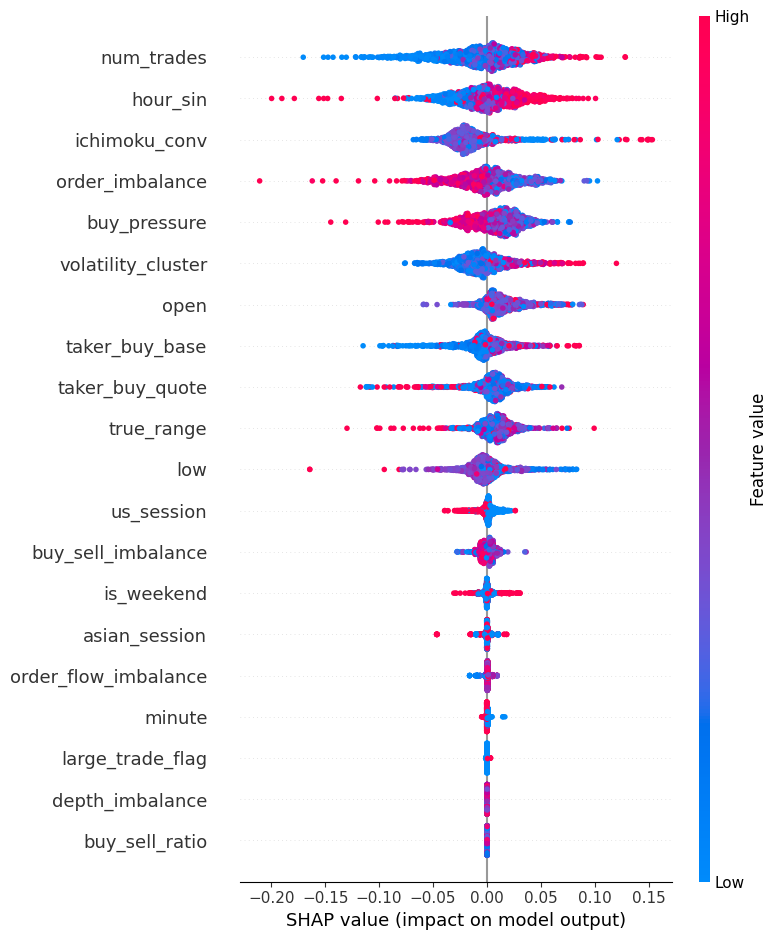

In [5]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 7.02% of total importance
Top 20 features explain 77.88% of total importance
Ratio (Top/Bottom): 11.09x


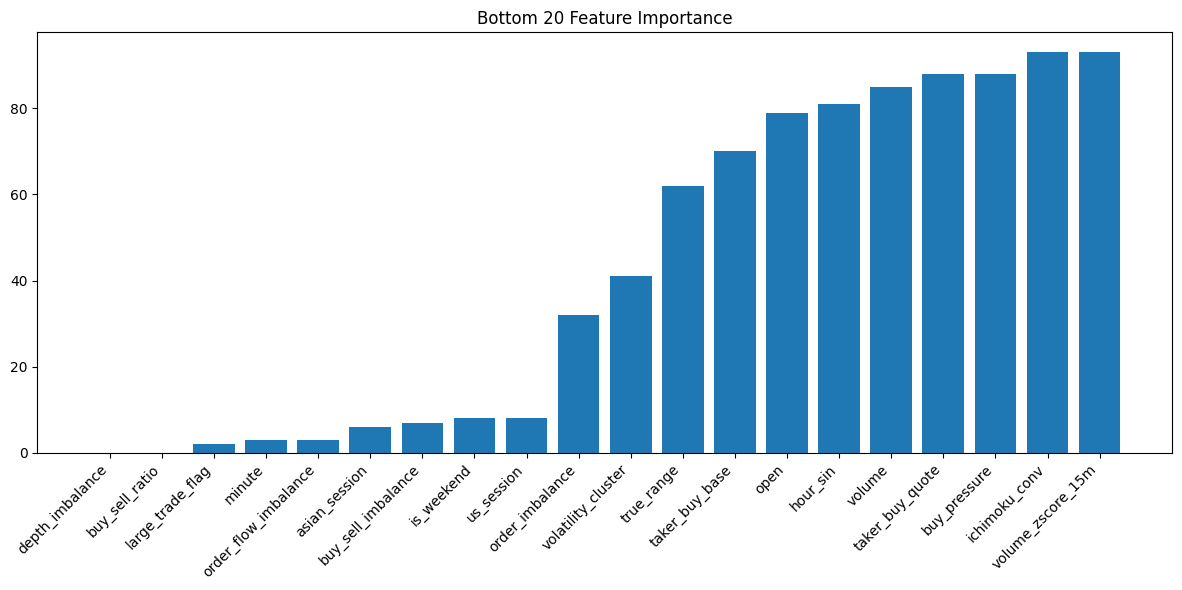

In [6]:
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="30m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()